In [37]:
from artificial_data import *
from sklearn.metrics import adjusted_rand_score as AR
X, labels = importBiggerArtificialData()
# X, labels = importSmallerArtificialData()

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans



def graphLaplacian(A):
    D = np.eye(A.shape[0]) * A.sum(axis=0) # diagonal matrix of degrees
    return D  - A # L = D - A
    



def calculateEigenVectorsOfGraphLaplacian(L):
    eigenValues, eigenVectors = np.linalg.eig(L)
    eigenValues, eigenVectors = eigenValues.real, eigenVectors.real
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return eigenValues,eigenVectors
    
    
    
def nodeRepresentation(eigenVectors, nodeRepresentationDim, n_of_components=1):
    m = n_of_components # we assume n of connected components = 1
    Z = eigenVectors[:,m:(nodeRepresentationDim + m)] # we omit m first eigenvectors, where m is the number of components of graph from A
    return Z
    
    

def connectTheGraph(A, dist_indx_arr=None):
    
    # to be implemented
        # trivial case of adding an edge:
    W = A
    G = nx.from_numpy_array(W)
    graphs = list(nx.connected_components(G))
    for i in range(len(graphs)-1):

        for g in graphs[i]:
            for f in graphs[i+1]:
                W[f,g] = 1
                W[g,f] = 1
                break
            break
#     print(nx.number_connected_components(nx.from_numpy_array(W)))
    
    return W

# connects graph of a given adjacency matrix ( 0 and 1 values, symmetric matrix) 
# how? all nodes with the highest degrees of a given component c_i get an edge with all nodes with highest degree of component c_j
def connect_A(A):    
    
    print("H<<<<?")
    W = A
    G = nx.from_numpy_array(W)
    graphs = list(nx.connected_components(G))

    lista_list = list()
    
    print(f'Connected components: {nx.number_connected_components(G)}')

    for i in range(nx.number_connected_components(G)):
        degree_sequence = sorted([d for n, d in G.subgraph(graphs[i]).degree()], reverse=True)
        # print "Degree sequence", degree_sequence
        dmax = max(degree_sequence)


        dict_ = dict(G.subgraph(graphs[i]).degree)


        lista_list.append([k for k, v in dict_.items() if v == dmax ])

    for i in range(len(lista_list)):
    #     print("FIRST")
    #     print(lista_list[i])
        for j in range(i+1, len(lista_list)):

    #         print("SECND:")
    #         print(lista_list[(i+1):])

            for k in lista_list[i]:
                for l in lista_list[j]:
                    print(f"added adge {k} - {l}")

                    W[k,l] = 1
                    W[l,k] = 1


    print(nx.is_connected(nx.from_numpy_array(W))) # True

    return W

# connecting random ~ 1/k^2 of all possible edges (comparing to connect_A() function)
def connect_A_k(A, k_clusters):    
    
    
    fraction_of_edges = 1/(float(k_clusters))**2
#     print(fraction_of_edges)
    
    W = A
    G = nx.from_numpy_array(W)
    graphs = list(nx.connected_components(G))

    lista_list = list()

    for i in range(nx.number_connected_components(G)):
        degree_sequence = sorted([d for n, d in G.subgraph(graphs[i]).degree()], reverse=True)
        # print "Degree sequence", degree_sequence
        dmax = max(degree_sequence)


        dict_ = dict(G.subgraph(graphs[i]).degree)


        lista_list.append([k for k, v in dict_.items() if v == dmax ])

    for i in range(len(lista_list)):
    #     print("FIRST")
    #     print(lista_list[i])
        for j in range(i+1, len(lista_list)):

    #         print("SECND:")
    #         print(lista_list[(i+1):])

            for k in lista_list[i]:
                for l in lista_list[j]:
#                     print(f'contition 1: {np.random.uniform(0,1) <= fraction_of_edges}')
                    
                    if i == 0:
                        print(f"added adge {k} - {l}")
                        W[k,l] = 1
                        W[l,k] = 1
                    elif np.random.uniform(0,1) <= fraction_of_edges: # maximally 1/k^2 edges will be added
                        print(f"added adge {k} - {l}")
                        W[k,l] = 1
                        W[l,k] = 1


    print(nx.is_connected(nx.from_numpy_array(W))) # True

    return W



In [2]:
spectralClustering2Dziki(X, n_of_clusters=3, M=3, nodeRepresentationDim=3)

array([1, 1, 1, ..., 0, 2, 2])

# Real data loading

In [2]:
from real_data import importFacebookTvShowData

In [3]:
A_real = importFacebookTvShowData()

In [4]:
A_real.shape

(3892, 3892)

In [5]:
G = nx.from_numpy_array(A_real)



nx.number_connected_components(G)

1

In [6]:
G = nx.from_numpy_array(A_real[0:1000,0:1000])



nx.number_connected_components(G)

410

In [7]:
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

check_symmetric(A_real)

True

# Fb (real data) graph data visualization

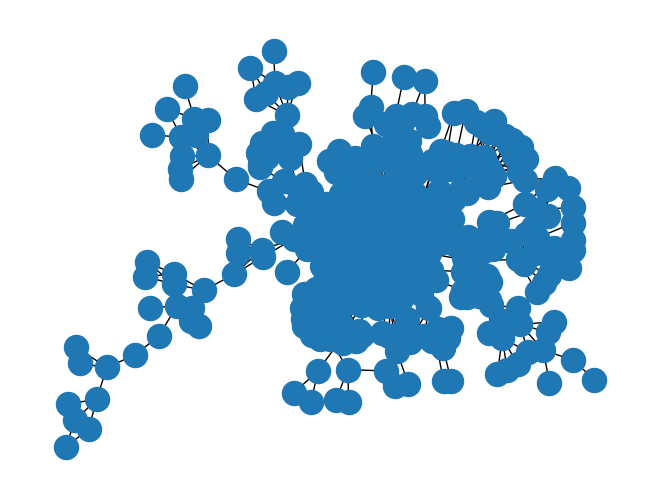

In [31]:
G = nx.from_numpy_array(A_real[0:1000,0:1000])


nx.draw_kamada_kawai(G)

Trying to delete some nodes to that the number of components would be greater than 1

In [9]:
G = nx.from_numpy_array(A_real[0:3800,0:3800])



nx.number_connected_components(G)

25

In [12]:
def spectralClustering_for_graph(A, n_of_clusters=3, nodeRepresentationDim=3):
    
#     A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    A_connected = connectTheGraph(A=A)
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    

#     print(Z.shape)
    kmeans = KMeans(n_clusters=n_of_clusters, random_state=0, n_init=100).fit(Z)
    return kmeans.labels_

def spectralClustering3_for_graph(A, n_of_clusters=3, nodeRepresentationDim=3):
    
#     A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    A_connected = connect_A(A)
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    

#     print(Z.shape)
    kmeans = KMeans(n_clusters=n_of_clusters, random_state=0, n_init=100).fit(Z)
    return kmeans.labels_

def spectralClustering4_for_graph(A, n_of_clusters=3, nodeRepresentationDim=3):
    
#     A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    A_connected = connect_A_k(A, k_clusters=n_of_clusters)
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    

#     print(Z.shape)
    kmeans = KMeans(n_clusters=n_of_clusters, random_state=0, n_init=100).fit(Z)
#     print(AR(kmeans.labels_, labels[0]))
    return kmeans.labels_

In [39]:
import time

In [52]:
import time

A_real = importFacebookTvShowData()[0:3800, 0:3800]
st = time.time()
spectralClustering_for_graph(A_real,3,3)
et = time.time()
print(f"Trivial adding of edges, time[s] :  {et-st}")


Trivial adding of edges, time[s] :  35.24228096008301


In [53]:
A_real = importFacebookTvShowData()[0:3800, 0:3800]
st = time.time()
spectralClustering3_for_graph(A_real,3,3)
et = time.time()
print(f"Trivial adding of edges, time[s] :  {et-st}")

A_real = importFacebookTvShowData()[0:3800, 0:3800]
st = time.time()
spectralClustering4_for_graph(A_real,3,3)
et = time.time()
print(f"Trivial adding of edges, time[s] :  {et-st}")

hello
H<<<<?
Connected components: 25
added adge 2008 - 341
added adge 3254 - 341
added adge 2008 - 486
added adge 3254 - 486
added adge 2008 - 2156
added adge 3254 - 2156
added adge 2008 - 656
added adge 3254 - 656
added adge 2008 - 2070
added adge 3254 - 2070
added adge 2008 - 818
added adge 3254 - 818
added adge 2008 - 1319
added adge 3254 - 1319
added adge 2008 - 1345
added adge 2008 - 1886
added adge 3254 - 1345
added adge 3254 - 1886
added adge 2008 - 1408
added adge 3254 - 1408
added adge 2008 - 1490
added adge 3254 - 1490
added adge 2008 - 1527
added adge 3254 - 1527
added adge 2008 - 1683
added adge 3254 - 1683
added adge 2008 - 1724
added adge 3254 - 1724
added adge 2008 - 1895
added adge 3254 - 1895
added adge 2008 - 1942
added adge 3254 - 1942
added adge 2008 - 2337
added adge 3254 - 2337
added adge 2008 - 2392
added adge 2008 - 2349
added adge 2008 - 3102
added adge 3254 - 2392
added adge 3254 - 2349
added adge 3254 - 3102
added adge 2008 - 2383
added adge 3254 - 2383
adde

True
after connecting
Trivial adding of edges, time[s] :  35.81604552268982
added adge 2008 - 341
added adge 3254 - 341
added adge 2008 - 486
added adge 3254 - 486
added adge 2008 - 2156
added adge 3254 - 2156
added adge 2008 - 656
added adge 3254 - 656
added adge 2008 - 2070
added adge 3254 - 2070
added adge 2008 - 818
added adge 3254 - 818
added adge 2008 - 1319
added adge 3254 - 1319
added adge 2008 - 1345
added adge 2008 - 1886
added adge 3254 - 1345
added adge 3254 - 1886
added adge 2008 - 1408
added adge 3254 - 1408
added adge 2008 - 1490
added adge 3254 - 1490
added adge 2008 - 1527
added adge 3254 - 1527
added adge 2008 - 1683
added adge 3254 - 1683
added adge 2008 - 1724
added adge 3254 - 1724
added adge 2008 - 1895
added adge 3254 - 1895
added adge 2008 - 1942
added adge 3254 - 1942
added adge 2008 - 2337
added adge 3254 - 2337
added adge 2008 - 2392
added adge 2008 - 2349
added adge 2008 - 3102
added adge 3254 - 2392
added adge 3254 - 2349
added adge 3254 - 3102
added adge 2

# Node representation visualization

In [10]:
A_real2 = A_real[0:3800,0:3800]

In [34]:
def spectralClustering_for_graph(A, n_of_clusters=3, nodeRepresentationDim=3):
    
#     A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    A_connected = connectTheGraph(A=A)
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    

#     print(Z.shape)
    kmeans = KMeans(n_clusters=n_of_clusters, random_state=0, n_init=100).fit(Z)
    return kmeans.labels_,Z

def spectralClustering3_for_graph(A, n_of_clusters=3, nodeRepresentationDim=3):
    
#     A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    print("hello")
    A_connected = connect_A(A)
    print("after connecting")
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    

#     print(Z.shape)
    kmeans = KMeans(n_clusters=n_of_clusters, random_state=0, n_init=100).fit(Z)
    return kmeans.labels_,Z

def spectralClustering4_for_graph(A, n_of_clusters=3, nodeRepresentationDim=3):
    
#     A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    A_connected = connect_A_k(A, k_clusters=n_of_clusters)
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    

#     print(Z.shape)
    kmeans = KMeans(n_clusters=n_of_clusters, random_state=0, n_init=100).fit(Z)
#     print(AR(kmeans.labels_, labels[0]))
    return kmeans.labels_,Z

In [51]:
A_real2 = importFacebookTvShowData()[0:3800, 0:3800]
l1,z1 = spectralClustering_for_graph(A_real2, 3,3)

In [50]:
A_real2 = importFacebookTvShowData()[0:3800, 0:3800]



l2,z2 = spectralClustering3_for_graph(A_real2, 3,3)

A_real2 = importFacebookTvShowData()[0:3800, 0:3800]
l3,z3 = spectralClustering4_for_graph(A_real2, 3,3)

hello
H<<<<?
Connected components: 25
added adge 2008 - 341
added adge 3254 - 341
added adge 2008 - 486
added adge 3254 - 486
added adge 2008 - 2156
added adge 3254 - 2156
added adge 2008 - 656
added adge 3254 - 656
added adge 2008 - 2070
added adge 3254 - 2070
added adge 2008 - 818
added adge 3254 - 818
added adge 2008 - 1319
added adge 3254 - 1319
added adge 2008 - 1345
added adge 2008 - 1886
added adge 3254 - 1345
added adge 3254 - 1886
added adge 2008 - 1408
added adge 3254 - 1408
added adge 2008 - 1490
added adge 3254 - 1490
added adge 2008 - 1527
added adge 3254 - 1527
added adge 2008 - 1683
added adge 3254 - 1683
added adge 2008 - 1724
added adge 3254 - 1724
added adge 2008 - 1895
added adge 3254 - 1895
added adge 2008 - 1942
added adge 3254 - 1942
added adge 2008 - 2337
added adge 3254 - 2337
added adge 2008 - 2392
added adge 2008 - 2349
added adge 2008 - 3102
added adge 3254 - 2392
added adge 3254 - 2349
added adge 3254 - 3102
added adge 2008 - 2383
added adge 3254 - 2383
adde

True
after connecting
added adge 2008 - 341
added adge 3254 - 341
added adge 2008 - 486
added adge 3254 - 486
added adge 2008 - 2156
added adge 3254 - 2156
added adge 2008 - 656
added adge 3254 - 656
added adge 2008 - 2070
added adge 3254 - 2070
added adge 2008 - 818
added adge 3254 - 818
added adge 2008 - 1319
added adge 3254 - 1319
added adge 2008 - 1345
added adge 2008 - 1886
added adge 3254 - 1345
added adge 3254 - 1886
added adge 2008 - 1408
added adge 3254 - 1408
added adge 2008 - 1490
added adge 3254 - 1490
added adge 2008 - 1527
added adge 3254 - 1527
added adge 2008 - 1683
added adge 3254 - 1683
added adge 2008 - 1724
added adge 3254 - 1724
added adge 2008 - 1895
added adge 3254 - 1895
added adge 2008 - 1942
added adge 3254 - 1942
added adge 2008 - 2337
added adge 3254 - 2337
added adge 2008 - 2392
added adge 2008 - 2349
added adge 2008 - 3102
added adge 3254 - 2392
added adge 3254 - 2349
added adge 3254 - 3102
added adge 2008 - 2383
added adge 3254 - 2383
added adge 2008 - 24

In [ ]:
A_real2





In [16]:
import matplotlib.pyplot as plt

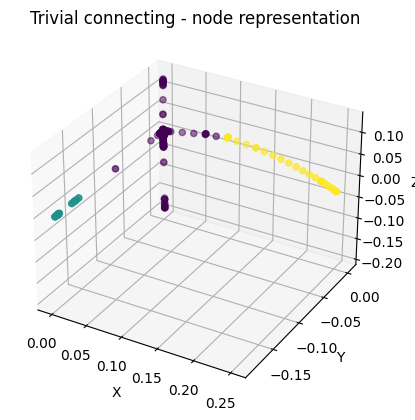

In [54]:
# xs = np.array(list(range(2,20)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

z = z1

ax.scatter(z[:,0], z[:,1], z[:,2], c=l1, marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title("Trivial connecting - node representation")

# plt.xticks(xs, (xs).astype(int))
plt.show()

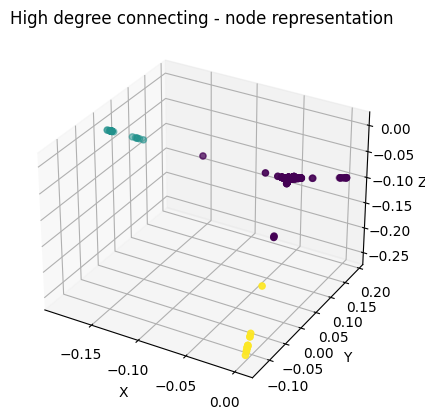

In [61]:
# xs = np.array(list(range(2,20)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

z = z2

ax.scatter(z[:,0], z[:,1], z[:,2], c=l2, marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title("High degree connecting - node representation")

# plt.xticks(xs, (xs).astype(int))
plt.show()

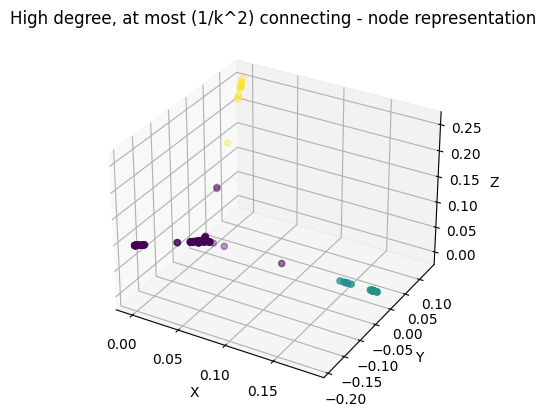

In [62]:
# xs = np.array(list(range(2,20)))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

z = z3

ax.scatter(z[:,0], z[:,1], z[:,2], c=l3, marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title("High degree, at most (1/k^2) connecting - node representation")

# plt.xticks(xs, (xs).astype(int))
plt.show()

In [58]:
(z2 == z3).all()

False

In [60]:
A_real2 = importFacebookTvShowData()[0:3800, 0:3800]
G = nx.from_numpy_array(A_real2)



nx.number_connected_components(G)

25

# Conclusions ( time, node representation):
The respective algorithms took following amount of time to complete:

- 35.24 s
- 35.81 s
- 35.59 s

The time complexity of adding edges based on highest degree is similarly time-consuming as for the trivial connection technique.

**If adding edges based on the highest degree will lead to better node representation, it seems to be worthy, as it is similarly time-consuming.**
